In [1]:
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%pylab inline
%config InlineBackend.figure_format = 'retina'

Populating the interactive namespace from numpy and matplotlib


In [2]:
from fancyimpute import KNN
from imblearn.over_sampling import RandomOverSampler

In [3]:
df_adult = pd.read_excel('2017-06-28_ABDoseAdult_MW-v4.xlsx')
df       = pd.read_excel('2017-06-28_ABDoseAdult_MW-v4.xlsx')

df_adult['fu48_clinical_outcome'] = df_adult['fu48_clinical_outcome'].replace(3,2)
df_adult['fu48_clinical_outcome'] = df_adult['fu48_clinical_outcome'].replace(4,3)

df_neat = pd.read_csv('Adult_copy_sample.csv')
df_neat = df_neat.iloc[:,2:]
df_neat = df_neat.iloc[:,:191]

In [4]:
df_fu_48 = df_adult.iloc[:,163:849]
df_fu_48 = df_fu_48.drop(['fu48_los'], axis=1)

df_fu_48 = pd.concat([df_neat,
                      df_adult['apache'],
                      df_fu_48],axis=1)

drop_dict = ['hospadmin_egfr',
             'baseline_egfr',
             'sd1_warfarin_yn',
             'sd1_egfr_60',
             'sd1_egfr',
             'sd2_warfarin_yn',
             'sd2_egfr_60',
             'sd2_egfr',
             'other_no_of_doses']

for column in drop_dict:
    df_fu_48 = df_fu_48.drop([column], axis=1)

In [5]:
for column in df_fu_48:
    if  df_fu_48[column].isnull().sum()/len(df_fu_48) > 0.5:
        df_fu_48 = df_fu_48.drop([column], axis=1)
        
df_object = df_fu_48.select_dtypes(include=['object'])
df_fu_48 = df_fu_48.select_dtypes(exclude=['object'])

In [6]:
def onehot_column(df, column_name):
    dummies = pd.get_dummies(df[column_name], prefix = column_name)
    return dummies

cat_dict = ['sd1_vent',
            'sd1_gcs_eyes',
            'sd1_gcs_voice',
            'sd1_gcs_move',
            'sd1_abg_source',
            'sd2_vent',
            'sd2_gcs_eyes',
            'sd2_gcs_voice',
            'sd2_gcs_move',
            'sd2_abg_source']

for item in cat_dict:
    df_fu_48 = pd.concat([df_fu_48, onehot_column(df_fu_48, item)],axis=1)
    df_fu_48 = df_fu_48.drop([item],axis=1)

In [7]:
df_fu_48['fu48_clinical_outcome'] = df_fu_48['fu48_clinical_outcome'].replace(1,0)
df_fu_48['fu48_clinical_outcome'] = df_fu_48['fu48_clinical_outcome'].replace(2,1)
df_fu_48['fu48_clinical_outcome'] = df_fu_48['fu48_clinical_outcome'].replace(3,1)

In [8]:
df_nnm = KNN(k=5).complete(df_fu_48)

Imputing row 1/144 with 0 missing, elapsed time: 0.042
Imputing row 101/144 with 4 missing, elapsed time: 0.115


In [9]:
df_nnm = pd.DataFrame(df_nnm, columns=df_fu_48.columns, index=df_fu_48.index)

bmi = df_nnm['weight']/((df_nnm['height']/100)**2)
bmi = bmi.to_frame(name='bmi')
df_nnm = pd.concat([df_nnm,
                    bmi], axis=1)

np.any(np.isnan(df_nnm))

False

In [10]:
X = df_nnm.drop(['fu48_clinical_outcome'], axis=1)
y = df_nnm['fu48_clinical_outcome']
# pca = PCA(n_components=2)
# X_vis = pca.fit_transform(X)

# X_tsne = TSNE(learning_rate=100).fit_transform(X)
# X_pca = PCA().fit_transform(df_sample.iloc[:,:-2])

# ros = RandomOverSampler()
# X_resampled, y_resampled = ros.fit_sample(X, y)
# X_res_vis = pca.transform(X_resampled)

In [57]:
df_fu_7 = df.iloc[:,849:991]
df_fu_7 = df_fu_7.drop(['fu7_los'], axis=1)

df_fu_7 = pd.concat([df_fu_48,
                     df_fu_7],axis=1)

drop_dict = ['fu48_cause_of_death',
             'fu48_cause_of_death_other',
             'fu48_abx_change_other',
             'abx_fu48_dose',
             'abx_fu48_freq',
             'abx_fu48_duration',
             'abx2_fu48_yn',
             'abx2_fu48_dose',
             'abx2_fu48_freq',
             'abx2_fu48_duration',
             'abx3_fu48_yn',
             'abx3_fu48_dose',
             'abx3_fu48_freq',
             'abx3_fu48_duration',
             'abx4_fu48_yn',
             'fu48_egfr']

for column in drop_dict:
    df_fu_7 = df_fu_7.drop([column], axis=1)

In [58]:
df_fu_7 = df_fu_7.select_dtypes(exclude=['object'])

for column in df_fu_7:
    if  df_fu_7[column].isnull().sum()/len(df_fu_7)>0.5:
        df_fu_7 = df_fu_7.drop([column], axis=1)

In [59]:
df_fu_7['fu7_clinical_outcome'] = df_fu_7['fu7_clinical_outcome'].replace(1,0)
df_fu_7['fu7_clinical_outcome'] = df_fu_7['fu7_clinical_outcome'].replace(2,1)
df_fu_7['fu7_clinical_outcome'] = df_fu_7['fu7_clinical_outcome'].replace(3,1)

df_fu_7 = df_fu_7.drop(['fu48_clinical_outcome'],axis=1)

In [60]:
df_fu_7 = pd.concat([df_fu_7,
                     df.fu48_clinical_outcome],axis=1)

df_fu_7 = df_fu_7.loc[df_fu_7['fu48_clinical_outcome'] != 4]

cat_dict = ['abx_fu48',
            'abx2_fu48',
            'abx3_fu48',
            'abx4_fu48',
            'fu48_vent',
            'fu48_gcs_eyes',
            'fu48_gcs_voice',
            'fu48_gcs_move',
            'fu48_abg_source',
            'hour_48_follow_up_complete']

for item in cat_dict:
    df_fu_7 = pd.concat([df_fu_7, onehot_column(df_fu_7, item)],axis=1)
    df_fu_7 = df_fu_7.drop([item],axis=1)

In [62]:
df_nnm = KNN(k=5).complete(df_fu_7)

Imputing row 1/128 with 1 missing, elapsed time: 0.038
Imputing row 101/128 with 31 missing, elapsed time: 0.079


In [63]:
df_nnm = pd.DataFrame(df_nnm, columns=df_fu_7.columns, index=df_fu_7.index)

bmi = df_nnm['weight']/((df_nnm['height']/100)**2)
bmi = bmi.to_frame(name='bmi')
df_nnm = pd.concat([df_nnm,
                    bmi], axis=1)

np.any(np.isnan(df_nnm))

False

In [64]:
X = df_nnm.drop(['fu7_clinical_outcome'], axis=1)
y = df_nnm['fu7_clinical_outcome']

ros = RandomOverSampler()
X_resampled, y_resampled = ros.fit_sample(X, y)

In [11]:
from sklearn.decomposition import TruncatedSVD

In [12]:
X_reduced = TruncatedSVD(n_components=50, random_state=0).fit_transform(X)
X_embedded = TSNE(n_components=2, perplexity=40, verbose=2).fit_transform(X_reduced)

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 144 / 144
[t-SNE] Mean sigma: 267.958005
[t-SNE] Iteration 25: error = 1.8400167, gradient norm = 0.0564847
[t-SNE] Iteration 50: error = 1.8827219, gradient norm = 0.0022989
[t-SNE] Iteration 75: error = 1.7412659, gradient norm = 0.0013094
[t-SNE] Iteration 100: error = 1.6893959, gradient norm = 0.0014448
[t-SNE] KL divergence after 100 iterations with early exaggeration: 1.689396
[t-SNE] Iteration 125: error = 1.5908740, gradient norm = 0.0012715
[t-SNE] Iteration 150: error = 1.5485494, gradient norm = 0.0012894
[t-SNE] Iteration 175: error = 1.5334258, gradient norm = 0.0012942
[t-SNE] Iteration 200: error = 1.5294060, gradient norm = 0.0012902
[t-SNE] Iteration 225: error = 1.5282776, gradient norm = 0.0012900
[t-SNE] Iteration 250: error = 1.5279644, gradient norm = 0.0012898
[t-SNE] Iteration 275: error = 1.5278774, gradient norm = 0.0012898


In [2]:
df = pd.read_csv('Adult_copy_sample.csv')

In [3]:
df_sample = df.iloc[:,2:198]

In [4]:
df_sample = df_sample.drop(['CRP',
                            'other_antimicrobial2_dose',     # Drop strings
                            'other_antimicrobial4_start',
                            'dose_vasopressor2_admin',
                            'dose_vasopressor3_admin',
                            'icuadmin_crp',
                            'hospadmin_crp'], axis=1) 

In [5]:
df_sample.iloc[:,:-2].head()

,age,sex,height,weight,ethnicity,abdose_abx_1___1,abdose_abx_1___2,abdose_abx_1___3,abdose_abx_1___4,abdose_abx_1___5,...,other_antimicrobial_28,other_antimicrobial_29,other_antimicrobial_30,other_antimicrobial_31,other_antimicrobial_32,other_antimicrobial_33,other_antimicrobial_34,other_antimicrobial_35,reason_for_icu_admission_1,reason_for_icu_admission_2
0,60.5,1,160.0,48.2,10,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,75.5,1,166.0,70.0,3,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,61.3,0,192.0,120.0,10,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,45.9,0,170.0,127.0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,83.7,1,154.0,81.0,6,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [6]:
df_sample['fu48_clinical_outcome'] = df_sample['fu48_clinical_outcome'].replace(2,0)
df_sample['fu48_clinical_outcome'] = df_sample['fu48_clinical_outcome'].replace(3,0)
df_sample['fu48_clinical_outcome'] = df_sample['fu48_clinical_outcome'].replace(4,0)

df_sample['fu7_clinical_outcome'] = df_sample['fu7_clinical_outcome'].replace(2,0)
df_sample['fu7_clinical_outcome'] = df_sample['fu7_clinical_outcome'].replace(3,0)

In [7]:
X_tsne = TSNE(learning_rate=100).fit_transform(df_sample.iloc[:,:-2])
X_pca = PCA().fit_transform(df_sample.iloc[:,:-2])

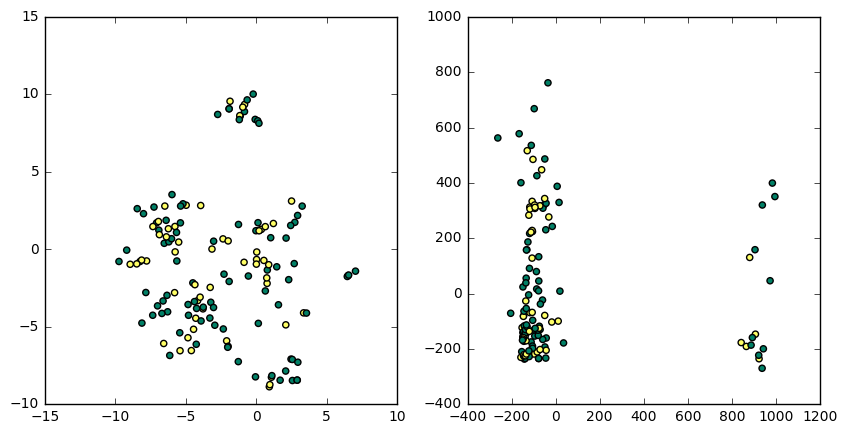

In [8]:
# tSNE using only the first 198 predictors (48hr follow up)
figure(figsize=(10, 5))
subplot(121)
scatter(X_tsne[:, 0], X_tsne[:, 1], c=df_sample['fu48_clinical_outcome'], cmap='summer')
subplot(122)
scatter(X_pca[:, 0], X_pca[:, 1], c=df_sample['fu48_clinical_outcome'], cmap='summer')

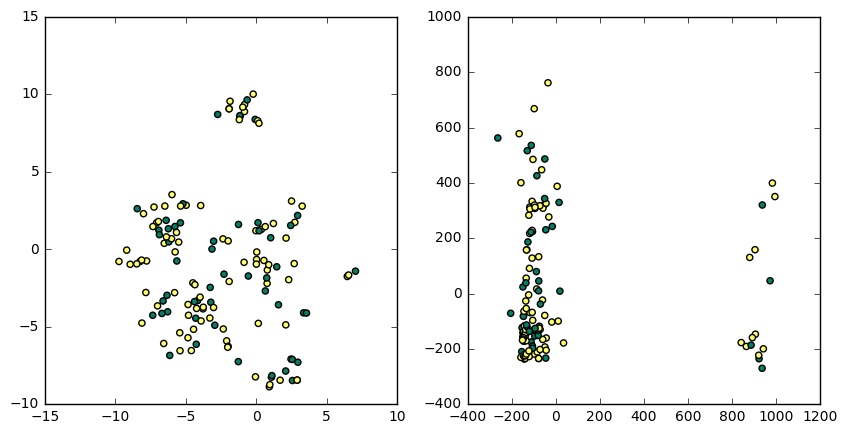

In [9]:
# tSNE using only the first 198 predictors (7d follow up)
figure(figsize=(10, 5))
subplot(121)
scatter(X_tsne[:, 0], X_tsne[:, 1], c=df_sample['fu7_clinical_outcome'], cmap='summer')
subplot(122)
scatter(X_pca[:, 0], X_pca[:, 1], c=df_sample['fu7_clinical_outcome'], cmap='summer')

In [10]:
from sklearn.decomposition import TruncatedSVD

X_reduced = TruncatedSVD(n_components=50, random_state=0).fit_transform(df_sample.iloc[:,:-2])

In [16]:
X_embedded = TSNE(n_components=2, perplexity=40, verbose=2).fit_transform(X_reduced)

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 144 / 144
[t-SNE] Mean sigma: 120.388673
[t-SNE] Iteration 25: error = 1.6752224, gradient norm = 0.0571890
[t-SNE] Iteration 50: error = 1.6154323, gradient norm = 0.0023817
[t-SNE] Iteration 75: error = 1.4191023, gradient norm = 0.0016164
[t-SNE] Iteration 100: error = 1.3542016, gradient norm = 0.0014361
[t-SNE] KL divergence after 100 iterations with early exaggeration: 1.354202
[t-SNE] Iteration 125: error = 1.2374656, gradient norm = 0.0014582
[t-SNE] Iteration 150: error = 1.1856619, gradient norm = 0.0013056
[t-SNE] Iteration 175: error = 1.1689025, gradient norm = 0.0012806
[t-SNE] Iteration 200: error = 1.1640882, gradient norm = 0.0012661
[t-SNE] Iteration 225: error = 1.1627167, gradient norm = 0.0012649
[t-SNE] Iteration 250: error = 1.1622580, gradient norm = 0.0012643
[t-SNE] Iteration 275: error = 1.1621478, gradient norm = 0.0012641


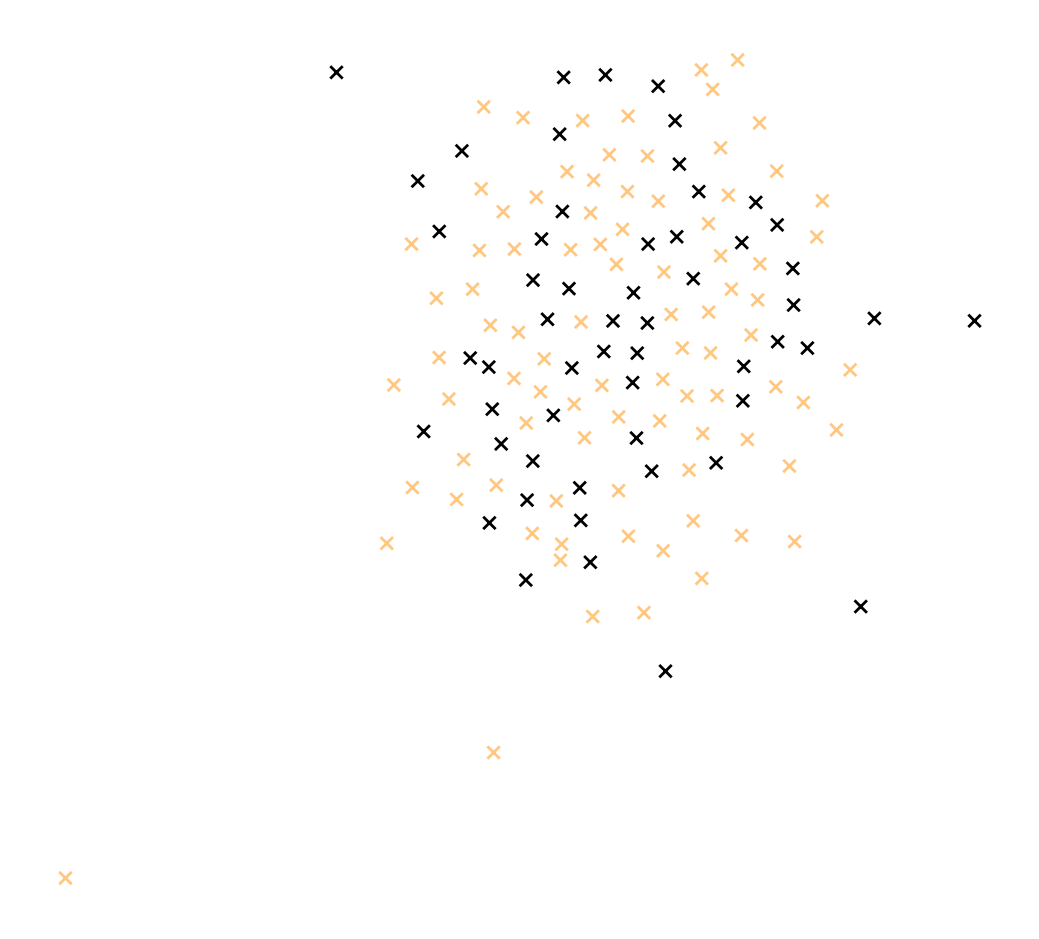

In [13]:
fig = figure(figsize=(5, 5))
ax = axes(frameon=False)
setp(ax, xticks=(), yticks=())
subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=0.9,
                wspace=0.0, hspace=0.0)
scatter(X_embedded[:, 0], X_embedded[:, 1],
        c=y, marker="x", cmap='copper')
fig.savefig('tsne_48_sf_original.pdf')

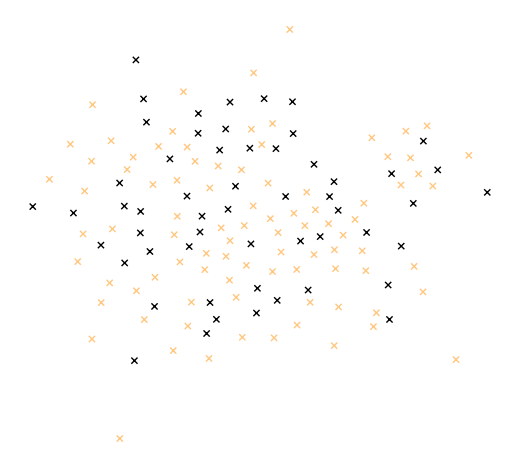

In [18]:
# tSNE of reduced form (7d follow up)
fig = figure(figsize=(5, 5))
ax = axes(frameon=False)
setp(ax, xticks=(), yticks=())
subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=0.9,
                wspace=0.0, hspace=0.0)
scatter(X_embedded[:, 0], X_embedded[:, 1],
        c=df_sample['fu7_clinical_outcome'], marker="x", cmap='copper')